# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, TimeDistributed, LSTM, MaxPooling2D, Input, MaxPooling3D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl, Nadam

In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (126 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [3]:
!pip install netCDF4 
!pip install PyDrive

     |████████████████████████████████| 4.7MB 6.1MB/s 
     |████████████████████████████████| 296kB 37.6MB/s 


In [4]:
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

# Import data to this colab environment
*One cell in this part needs authentication to your GDrive -- to check if you have access to the data-file*

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
## Need to authenticate to get the Datafile in this environment.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
downloaded = drive.CreateFile({'id':"1wDkyZRZUWSeMbfz5_XxeHXUD1HWgvHet"})
downloaded.GetContentFile('HadISST_Data_file')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

# Data visualization


In [8]:
f = gzip.open("/content/HadISST_Data_file")
f_nc = nc.Dataset('dummy', mode='r', memory=f.read())

In [9]:
All_variables = f_nc.variables
print(All_variables)

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: days since 1870-1-1 0:0:0
    calendar: gregorian
    long_name: Time
    standard_name: time
unlimited dimensions: time
current shape = (1808,)
filling on, default _FillValue of 9.969209968386869e+36 used), ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
float32 time_bnds(time, nv)
unlimited dimensions: time
current shape = (1808, 2)
filling on, default _FillValue of 9.969209968386869e+36 used), ('latitude', <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used), ('longitude', <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: Longitude
    standard_name: longitude
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968

In [10]:
time = f_nc['time'][:]
lat = f_nc['latitude'][0:30]
longi = f_nc['longitude'][:]
tb = f_nc['time_bnds'][:]
sic = f_nc['sic'][:,0:30,:]

In [11]:
print(sic[1,:,:])

[[1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [0.8799999952316284 0.8799999952316284 0.8500000238418579 ...
  0.4399999976158142 0.41999998688697815 0.8799999952316284]
 [0.4000000059604645 0.550000011920929 0.5899999737739563 ...
  0.28999999165534973 0.33000001311302185 0.3499999940395355]
 [0.0 0.17000000178813934 0.25 ... 0.0 0.0 0.0]]


In [12]:
sic = np.where(sic > 1, -0.5 , (np.where(sic < 0, -0.5 , sic)))

In [13]:
''' MIN MAX SCALING
for i in range(len(sic)):
  mx = np.amax(sic[i])
  mn = np.amin(sic[i])
  sic[i] = (sic[i] - mn)/(mx-mn)'''
print('min-max scaling not done')

min-max scaling not done


In [14]:
'''NUMBER OF POSITIVE AND NEGATIVE VALUES
a = 10
n = 30
m = 360
psum, pcount, nsum, ncount = 0,0,0,0
for i in range(n):
  for j in range(m):
    if sic[a,i,j] >= 0:
      psum += sic[a,i,j]
      pcount += 1
    else:
      nsum += sic[a,i,j]
      ncount += 1
print('total ' + str(30*360))
print('ncount ' + str(ncount))
print('pavg ' + str(psum/pcount))'''
print('NUMBER OF POSITIVE AND NEGATIVE VALUES')

NUMBER OF POSITIVE AND NEGATIVE VALUES


<function matplotlib.pyplot.show>

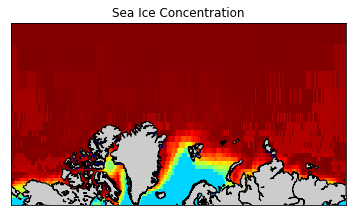

In [15]:
mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
longs , lats = np.meshgrid(longi,lat)
x ,y = mp(longs, lats)
c_scheme = mp.pcolor(x,y,np.squeeze(sic[18,:,:]), cmap = 'jet')
mp.drawcoastlines()
mp.fillcontinents()
plt.title('Sea Ice Concentration')
plt.show

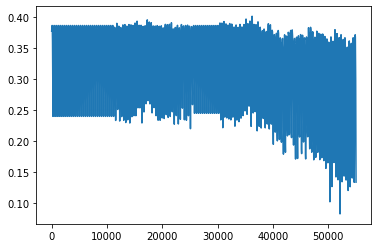

In [16]:
x = sic.reshape(1808, 10800).mean(axis=1)
plt.plot(time,x)
plt.show()

# NN

## Prepare the train-test Data



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, 30*360*N_stack))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack], axis=-1).flatten()

#Y = np.zeros(shape = (Y_len, 30, 360, N_months_predict))
Y = np.zeros(shape = (Y_len, 10800))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 32400)
(1805, 10800)


In [ ]:
N_train_test_split = 1600
X_train = X[:N_train_test_split]
Y_train = Y[:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1600
number of test examples = 205
X_train shape: (1600, 32400)
Y_train shape: (1600, 10800)
X_test shape: (205, 32400)
Y_test shape: (205, 10800)


## Implement NN  model

In [ ]:
model = Sequential()

model.add(Dense(50000, activation='tanh', input_dim=32400))
model.add(Dense(35000, activation='tanh'))
model.add(Dense(25000, activation='sigmoid'))
model.add(Dense(12500, activation='tanh'))
model.add(Dense(10800, activation='tanh'))

opt = Adagrad(lr=0.2)
model.compile(loss='mean_squared_error',
              optimizer = opt)

print(model.summary())

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=20, shuffle=False)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50000)             1620050000
_________________________________________________________________
dense_10 (Dense)             (None, 35000)             1750035000
_________________________________________________________________
dense_11 (Dense)             (None, 25000)             875025000 
_________________________________________________________________
dense_12 (Dense)             (None, 12500)             312512500 
_________________________________________________________________
dense_13 (Dense)             (None, 10800)             135010800 
Total params: 4,692,633,300
Trainable params: 4,692,633,300
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 18s 18s/step - loss: 0.7272 - val_loss: 0.2493


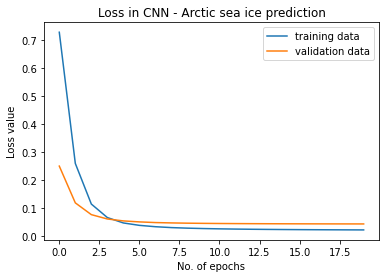

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss in CNN - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

0.92791164
0.9899999499320984


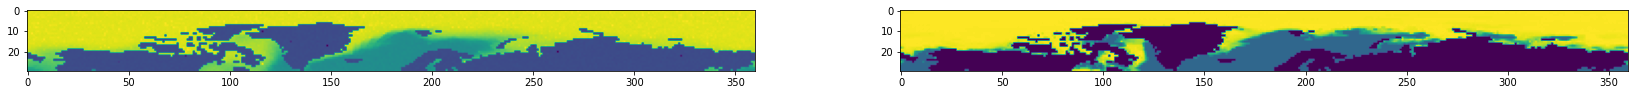

In [ ]:
X_check = X_test[-3:-2]
Y_check = Y_test[-3:-2]
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(30, 360)
Y_check = Y_check.reshape(30, 360)

x_coord = 1
y_coord = 1
print(Y_pred[x_coord, y_coord])
print(Y_check[x_coord, y_coord])

fig=plt.figure(figsize=(60, 720))
columns = 4
rows = 5
fig.add_subplot(rows, columns, 1)
plt.imshow(Y_pred)
fig.add_subplot(rows, columns, 2)
plt.imshow(Y_check)

plt.show()

# CNN (Without Dense Layer)


## Prepare the train-test Data



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, 30, 360, N_stack))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack], axis=-1)

#Y = np.zeros(shape = (Y_len, 30, 360, N_months_predict))
Y = np.zeros(shape = (Y_len, 30, 360,1))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1)

print(X.shape)
print(Y.shape)

(1805, 30, 360, 3)
(1805, 30, 360, 1)


In [ ]:
N_train_test_split = 1600
X_train = X[:N_train_test_split]
Y_train = Y[:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1600
number of test examples = 205
X_train shape: (1600, 30, 360, 3)
Y_train shape: (1600, 30, 360, 1)
X_test shape: (205, 30, 360, 3)
Y_test shape: (205, 30, 360, 1)


## Implement CNN  model

In [ ]:
model = Sequential()
model.add(Input(shape= X_train.shape[1:]))
model.add(Conv2D(16, (3, 3),activation = 'tanh',padding= 'same'))
model.add(Conv2D(24, (3, 3), activation = 'tanh',padding= 'same'))
model.add(Conv2D(28, (3, 3), activation = 'tanh',padding= 'same'))
model.add(Conv2D(32, (3, 3), activation = 'tanh',padding= 'same'))
model.add(Conv2D(1, (3, 3), activation = 'tanh',padding= 'same'))

model.compile(loss='mse', optimizer = 'RMSprop')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=15, shuffle=False)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 360, 16)       448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 360, 24)       3480      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 360, 28)       6076      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 360, 32)       8096      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 360, 1)        289       
Total params: 18,389
Trainable params: 18,389
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.3279 - val_loss: 0.1797
Epoch 2/15
1/1

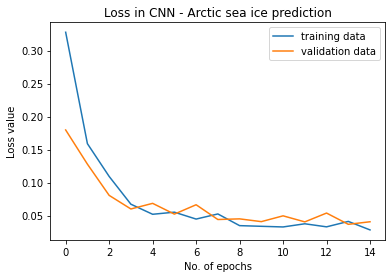

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss in CNN - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

0.81763035
0.9899999499320984


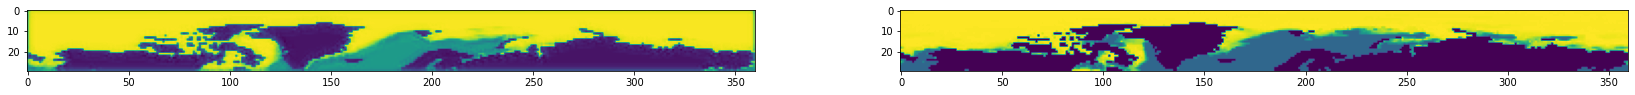

In [ ]:
X_check = X_test[-3:-2]
Y_check = Y_test[-3:-2]
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(30, 360)
Y_check = Y_check.reshape(30, 360)

x_coord = 1
y_coord = 1
print(Y_pred[x_coord, y_coord])
print(Y_check[x_coord, y_coord])

fig=plt.figure(figsize=(60, 720))
columns = 4
rows = 5
fig.add_subplot(rows, columns, 1)
plt.imshow(Y_pred)
fig.add_subplot(rows, columns, 2)
plt.imshow(Y_check)

plt.show()

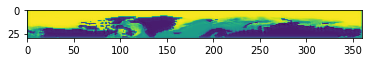

In [ ]:
## Predicting 3 months data
X_input = X[1735:1807]
Y1 = model.predict(X_input)
Y1 = Y1.reshape(70,30,360)
plt.imshow(Y1[-1])

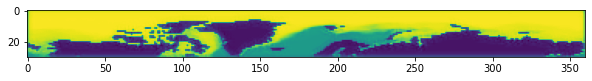

In [ ]:
## Predicting 3 months data
X_input = X[1733:1807]
Y1 = model.predict(X_input)
Y_avg = Y1
for i in range(2,len(Y1)):
  Y_avg[i] = (Y1[i] + Y1[i-1] + Y1[i-2])/3

plt.figure(figsize=(10, 120))
plt.imshow(Y_avg[-2].reshape(30,360))

# CNN (with Dense layer)

## Prepare the train-test Data



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, 30, 360, N_stack))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack], axis=-1)

#Y = np.zeros(shape = (Y_len, 30, 360, N_months_predict))
Y = np.zeros(shape = (Y_len, 10800))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 30, 360, 3)
(1805, 10800)


In [ ]:
print("DON'T REMOVE THIS CELL. IT CAN PREPARE THE TRAIN_TEST DATA INCLUDING TIME ARRAY IF TIME IS NEEDED.")
'''
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, 30, 360, N_stack+1))
for i in range(X_len):
  time_arr = np.full(shape=(30,360), fill_value=i/N_months_available)
  mask_time_arr = np.zeros(shape = time_arr.shape)
  time_arr = np.ma.array(time_arr, mask = mask_time_arr)
  temp_arr = []
  for _ in range(N_stack):
    temp_arr.append(sic[i+_])
  temp_arr.append(time_arr)
  temp_arr = np.array(temp_arr)
  X[i] = np.stack(temp_arr, axis = 2)

#Y = np.zeros(shape = (Y_len, 30, 360, N_months_predict))
Y = np.zeros(shape = (Y_len, 10800))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1).flatten()

print(X.shape)
print(Y.shape)
'''
print("DON'T REMOVE THIS CELL. IT CAN PREPARE THE TRAIN_TEST DATA INCLUDING TIME ARRAY IF TIME IS NEEDED.")

DON'T REMOVE THIS CELL. IT CAN PREPARE THE TRAIN_TEST DATA INCLUDING TIME ARRAY IF TIME IS NEEDED.
DON'T REMOVE THIS CELL. IT CAN PREPARE THE TRAIN_TEST DATA INCLUDING TIME ARRAY IF TIME IS NEEDED.


In [ ]:
N_train_test_split = 1600
X_train = X[:N_train_test_split]
Y_train = Y[:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1600
number of test examples = 205
X_train shape: (1600, 30, 360, 3)
Y_train shape: (1600, 10800)
X_test shape: (205, 30, 360, 3)
Y_test shape: (205, 10800)


## Implement CNN  model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),activation = 'tanh', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(48, (3, 3), activation = 'sigmoid'))

model.add(Conv2D(72, (3, 3), activation = 'tanh'))
model.add(Conv2D(108, (3, 3), activation = 'tanh'))

model.add(Flatten())

model.add(Dense(14000, activation='sigmoid'))
model.add(Dense(12500, activation='tanh'))
model.add(Dense(12000, activation='tanh'))
model.add(Dense(10800, activation='tanh'))

opt = Adagrad(lr=0.2)
model.compile(loss='mean_squared_error',
              optimizer = opt)

#print(model.summary())

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size=N_train_test_split, epochs=15, shuffle=False)

Epoch 1/15
1/1 [==============================] - 13s 13s/step - loss: 0.6844 - val_loss: 0.2854
Epoch 2/15
1/1 [==============================] - 12s 12s/step - loss: 0.3008 - val_loss: 0.1506
Epoch 3/15
1/1 [==============================] - 12s 12s/step - loss: 0.1543 - val_loss: 0.0940
Epoch 4/15
1/1 [==============================] - 12s 12s/step - loss: 0.0885 - val_loss: 0.0683
Epoch 5/15
1/1 [==============================] - 12s 12s/step - loss: 0.0580 - val_loss: 0.0576
Epoch 6/15
1/1 [==============================] - 12s 12s/step - loss: 0.0442 - val_loss: 0.0524
Epoch 7/15
1/1 [==============================] - 12s 12s/step - loss: 0.0372 - val_loss: 0.0496
Epoch 8/15
1/1 [==============================] - 12s 12s/step - loss: 0.0330 - val_loss: 0.0478
Epoch 9/15
1/1 [==============================] - 12s 12s/step - loss: 0.0303 - val_loss: 0.0466
Epoch 10/15
1/1 [==============================] - 12s 12s/step - loss: 0.0284 - val_loss: 0.0457
Epoch 11/15
1/1 [============

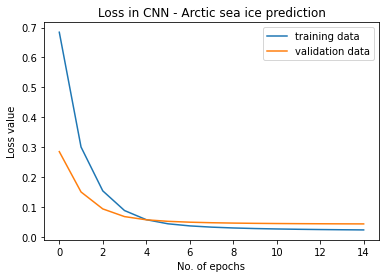

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss in CNN - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

0.9171409
0.9899999499320984


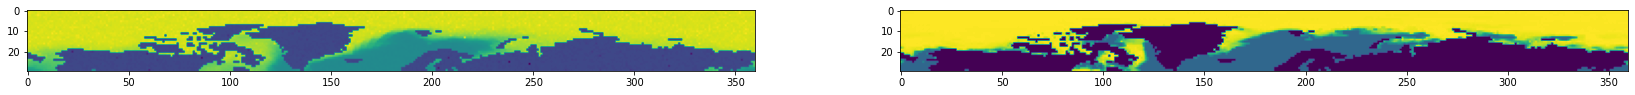

In [ ]:
X_check = X_test[-3:-2]
Y_check = Y_test[-3:-2]
Y_pred = model.predict(X_check)
Y_pred = Y_pred.reshape(30, 360)
Y_check = Y_check.reshape(30, 360)

x_coord = 1
y_coord = 1
print(Y_pred[x_coord, y_coord])
print(Y_check[x_coord, y_coord])

fig=plt.figure(figsize=(60, 720))
columns = 4
rows = 5
fig.add_subplot(rows, columns, 1)
plt.imshow(Y_pred)
fig.add_subplot(rows, columns, 2)
plt.imshow(Y_check)

plt.show()

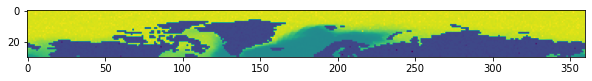

In [ ]:
## Predicting 3 months data
X_input = X[1733:1807]
Y1 = model.predict(X_input)
Y_avg = Y1
for i in range(2,len(Y1)):
  Y_avg[i] = (Y1[i] + Y1[i-1] + Y1[i-2])/3

plt.figure(figsize=(10, 120))
plt.imshow(Y_avg[-2].reshape(30,360))

# CNN-LSTM

## train-test data preparation



In [ ]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, N_stack, 30, 360))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack])

Y = np.zeros(shape = (Y_len, 10800))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict], axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 3, 30, 360)
(1805, 10800)


In [ ]:
N_train_test_split = 1600
X_train = X[:N_train_test_split]
Y_train = Y[:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1600
number of test examples = 205
X_train shape: (1600, 3, 30, 360)
Y_train shape: (1600, 10800)
X_test shape: (205, 3, 30, 360)
Y_test shape: (205, 10800)


## Model


In [ ]:
#Reshape x data for use with TimeDistributed wrapper, adding extra dimension at the end
numlat = X_train.shape[2]
numlong = X_train.shape[3]
stacklen = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], stacklen, numlat, numlong, 1)
X_test = X_test.reshape(X_test.shape[0], stacklen, numlat, numlong,  1)

model2 = Sequential()
print(X_train.shape)

model2.add(TimeDistributed(Conv2D(16, (3, 3), activation = 'sigmoid'),input_shape = (stacklen, numlat, numlong, 1)))
model2.add(TimeDistributed(MaxPool2D(pool_size=(2, 2))))

model2.add(TimeDistributed(Conv2D(24, (3, 3), activation = 'sigmoid')))

model2.add(TimeDistributed(Conv2D(32, (3, 3), activation = 'tanh')))

model2.add(TimeDistributed(Flatten()))

model2.add(LSTM(1000,  activation = 'tanh', return_sequences= True))
model2.add(LSTM(1000,  activation = 'tanh'))
model2.add(Dense(10800, activation='tanh'))
model2.compile(loss='mean_squared_error',
              optimizer='Adamax')

history2 = model2.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= N_train_test_split, epochs=15, shuffle=False)

print(model2.summary())

(1600, 3, 30, 360, 1)
Epoch 1/15
1/1 [==============================] - 14s 14s/step - loss: 0.5727 - val_loss: 0.4035
Epoch 2/15
1/1 [==============================] - 6s 6s/step - loss: 0.4392 - val_loss: 0.1859
Epoch 3/15
1/1 [==============================] - 6s 6s/step - loss: 0.1968 - val_loss: 0.0922
Epoch 4/15
1/1 [==============================] - 6s 6s/step - loss: 0.0809 - val_loss: 0.0801
Epoch 5/15
1/1 [==============================] - 6s 6s/step - loss: 0.0560 - val_loss: 0.0827
Epoch 6/15
1/1 [==============================] - 6s 6s/step - loss: 0.0533 - val_loss: 0.0803
Epoch 7/15
1/1 [==============================] - 6s 6s/step - loss: 0.0494 - val_loss: 0.0732
Epoch 8/15
1/1 [==============================] - 6s 6s/step - loss: 0.0423 - val_loss: 0.0660
Epoch 9/15
1/1 [==============================] - 6s 6s/step - loss: 0.0357 - val_loss: 0.0626
Epoch 10/15
1/1 [==============================] - 6s 6s/step - loss: 0.0325 - val_loss: 0.0619
Epoch 11/15
1/1 [========

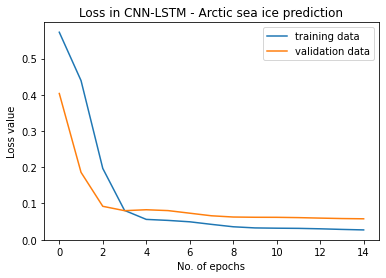

In [ ]:
plt.plot(history2.history['loss'], label='training data')
plt.plot(history2.history['val_loss'], label='validation data')
plt.title('Loss in CNN-LSTM - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

0.9847781
0.9899999499320984


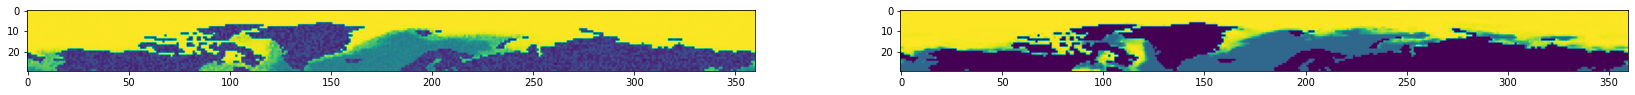

In [ ]:
X_check = X_test[-3:-2].reshape(1, N_stack, numlat, numlong,  1)
Y_check = Y_test[-3:-2]
Y_pred = model2.predict(X_check)
Y_pred = Y_pred.reshape(30, 360)
Y_check = Y_check.reshape(30, 360)

x_coord = 1
y_coord = 1
print(Y_pred[x_coord, y_coord])
print(Y_check[x_coord, y_coord])

fig=plt.figure(figsize=(60, 720))
columns = 4
rows = 5
fig.add_subplot(rows, columns, 1)
plt.imshow(Y_pred)
fig.add_subplot(rows, columns, 2)
plt.imshow(Y_check)

plt.show()

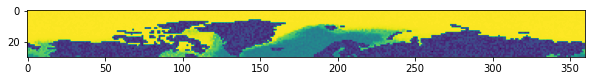

In [ ]:
## Predicting 3 months data
X_input = X[1733:1807].reshape(72, N_stack, numlat, numlong,  1)
Y1 = model2.predict(X_input)
Y_avg = Y1
for i in range(2,len(Y1)):
  Y_avg[i] = (Y1[i] + Y1[i-1] + Y1[i-2])/3

plt.figure(figsize=(10, 120))
plt.imshow(Y_avg[-2].reshape(30,360))

# ConvLSTM

## Prepare the train-test Data



In [17]:
N_months_available = len(sic)
N_months_predict = 1
N_stack = 3
X_len = N_months_available - (N_stack-1) - N_months_predict
Y_len = X_len

X = np.zeros(shape = (X_len, N_stack, 30, 360))
for i in range(X_len):
  X[i] = np.stack(sic[i:i+N_stack])

Y = np.zeros(shape = (Y_len, 10800))
#Y = np.zeros(shape = (Y_len,1,30,360))
for i in range(Y_len):
  Y[i] = np.stack(sic[i+N_stack : i+N_stack+N_months_predict],axis = -1).flatten()

print(X.shape)
print(Y.shape)

(1805, 3, 30, 360)
(1805, 10800)


In [18]:
N_train_test_split = 1600
X_train = X[:N_train_test_split]
Y_train = Y[:N_train_test_split]
X_test = X[N_train_test_split:]
Y_test = Y[N_train_test_split:]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1600
number of test examples = 205
X_train shape: (1600, 3, 30, 360)
Y_train shape: (1600, 10800)
X_test shape: (205, 3, 30, 360)
Y_test shape: (205, 10800)


## Conv-LSTM

In [19]:
from tensorflow import keras
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Input, Conv3D, TimeDistributed, Flatten
import numpy as np
import pylab as plt

#Reshape x data for use with keras, adding extra dimension at the end
numlat = X_train.shape[2]
numlong = X_train.shape[3]
stacklen = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], stacklen, numlat, numlong,1)
X_test = X_test.reshape(X_test.shape[0], stacklen, numlat, numlong,1)

model3 = keras.Sequential()
model3.add(Input(shape = X_train.shape[1:]))
model3.add(ConvLSTM2D(filters=16, kernel_size=(5,5), return_sequences=True, padding="same"))
model3.add(ConvLSTM2D(filters=24, kernel_size=(3,3), return_sequences=True, padding="same"))
model3.add(Conv3D(filters=16, kernel_size=(3,1,1), activation="tanh"))
model3.add(Conv3D(filters=1, kernel_size=(1,1,1), activation="tanh"))
model3.add(Flatten())
model3.add(Dense(10800, activation='tanh'))
model3.compile(loss="mean_squared_error", optimizer="adamax")
print(model3.summary())
plot_model(model3, show_shapes=True, show_layer_names=True)
history3 = model3.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= N_train_test_split, epochs=15, shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 3, 30, 360, 16)    27264     
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 3, 30, 360, 24)    34656     
_________________________________________________________________
conv3d (Conv3D)              (None, 1, 30, 360, 16)    1168      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 30, 360, 1)     17        
_________________________________________________________________
flatten (Flatten)            (None, 10800)             0         
_________________________________________________________________
dense (Dense)                (None, 10800)             116650800 
Total params: 116,713,905
Trainable params: 116,713,905
Non-trainable params: 0
__________________________________________

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Input, Conv3D, TimeDistributed, Flatten
import numpy as np
import pylab as plt

#Reshape x data for use with keras, adding extra dimension at the end
numlat = X_train.shape[2]
numlong = X_train.shape[3]
stacklen = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], stacklen, numlat, numlong,1)
X_test = X_test.reshape(X_test.shape[0], stacklen, numlat, numlong,1)

model3 = keras.Sequential()

model3.add(Input(shape = X_train.shape[1:]))

model3.add(BatchNormalization())
model3.add(ConvLSTM2D(filters=5, kernel_size=(5,5), return_sequences=True, activation="tanh"))
model3.add(ConvLSTM2D(filters=10, kernel_size=(3,3), return_sequences=True, activation="relu"))
model3.add(MaxPooling3D(pool_size=(2, 2, 2)))
model3.add(ConvLSTM2D(filters=11, kernel_size=(3,3), return_sequences=True, activation="tanh"))
model3.add(Conv3D(filters=16, kernel_size=(3,1,1), activation="tanh"))
model3.add(Flatten())
model3.add(Dense(10800, activation='tanh'))

model3.compile(loss="mse", optimizer="adamax")
print(model3.summary())

history3 = model3.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= N_train_test_split, epochs=15, shuffle=False)

ValueError: ignored

In [ ]:
## THIS CELL IMPLEMENTS A MODEL SIMILAR TO THAT DEVELOPED BY MAYUNA. BUT, OUTPUT GIVES ONLY SOME NOISE.

from tensorflow import keras
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Input, Conv3D, TimeDistributed, Flatten
import numpy as np
import pylab as plt

#Reshape x data for use with keras, adding extra dimension at the end
numlat = X_train.shape[2]
numlong = X_train.shape[3]
stacklen = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], stacklen, numlat, numlong, 1)
X_test = X_test.reshape(X_test.shape[0], stacklen, numlat, numlong, 1)

model3 = keras.Sequential()
model3.add(Input(shape = X_train.shape[1:]))
model3.add(BatchNormalization())
model3.add(ConvLSTM2D(filters=5, kernel_size=(5,5), return_sequences=True, activation="tanh"))
model3.add(ConvLSTM2D(filters=7, kernel_size=(3,3), return_sequences=True, activation="tanh"))
model3.add(ConvLSTM2D(filters=9, kernel_size=(3,3), return_sequences=True, activation="tanh"))
model3.add(ConvLSTM2D(filters=9, kernel_size=(3,3), return_sequences=True, activation="tanh"))
model3.add(BatchNormalization())
model3.add(Conv3D(filters=16, kernel_size=(1,5,5), activation="tanh"))
model3.add(BatchNormalization())
model3.add(Conv3D(filters=16, kernel_size=(1,3,3), activation="tanh"))
model3.add(BatchNormalization())
model3.add(Conv3D(filters=15, kernel_size=(1,3,3), activation="tanh"))
model3.add(BatchNormalization())
model3.add(MaxPooling3D(pool_size=(1, 2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(15000, activation='tanh'))
model3.add(Dense(10800, activation='tanh'))

model3.compile(loss="mse", optimizer="adamax")

print(model3.summary())

history3 = model3.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= N_train_test_split, epochs=15, shuffle=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 3, 30, 360, 1)     4         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 3, 26, 356, 16)    27264     
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 3, 24, 354, 24)    34656     
_________________________________________________________________
batch_normalization_4 (Batch (None, 3, 24, 354, 24)    96        
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 24, 354, 5)     365       
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 24, 354, 5)     20        
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 1, 12, 177, 5)    

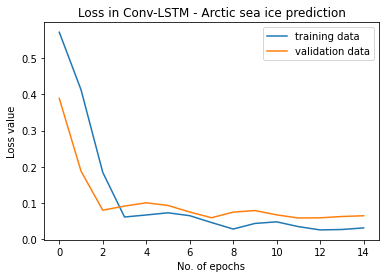

In [20]:
plt.plot(history3.history['loss'], label='training data')
plt.plot(history3.history['val_loss'], label='validation data')
plt.title('Loss in Conv-LSTM - Arctic sea ice prediction')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper right")
plt.show()

(13, 10800)


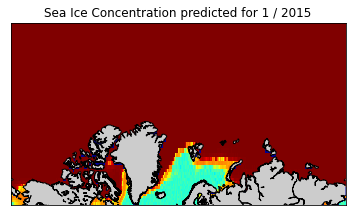

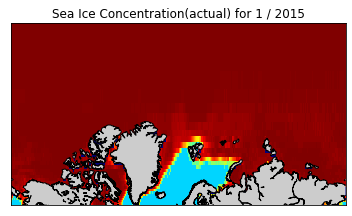

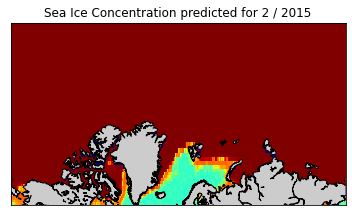

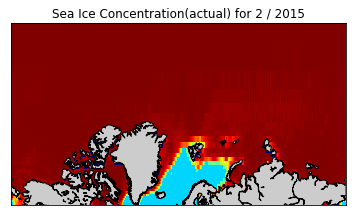

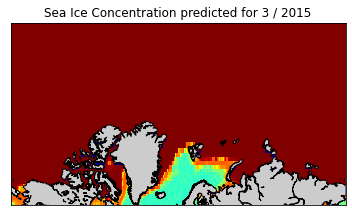

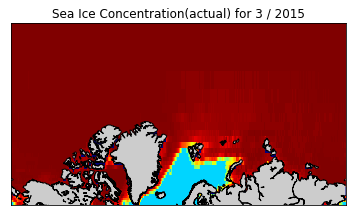

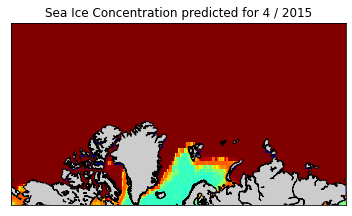

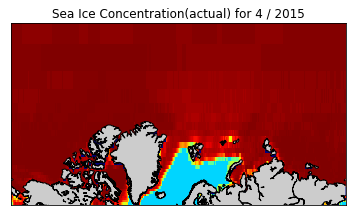

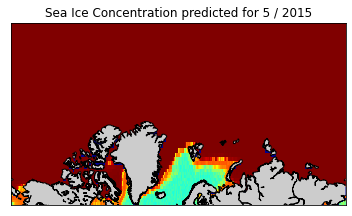

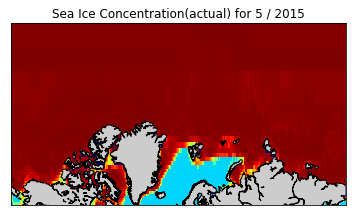

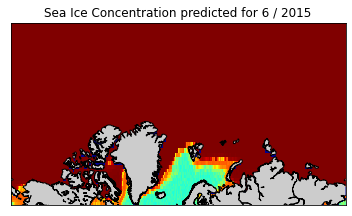

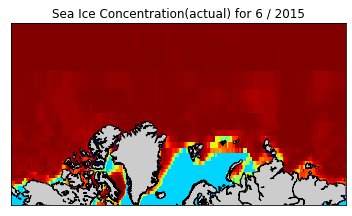

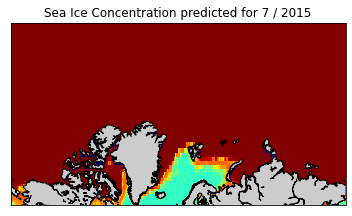

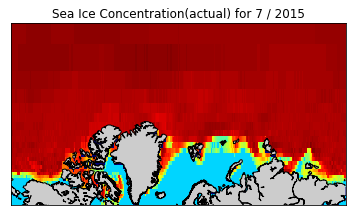

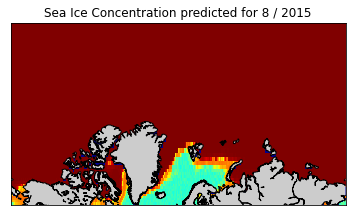

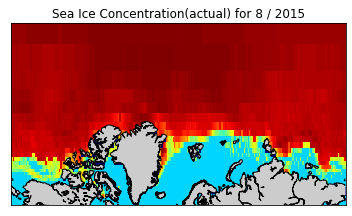

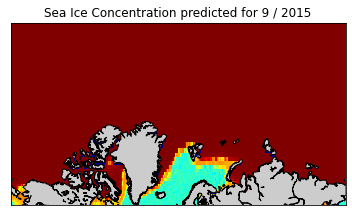

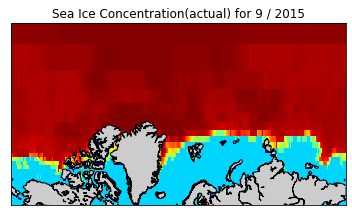

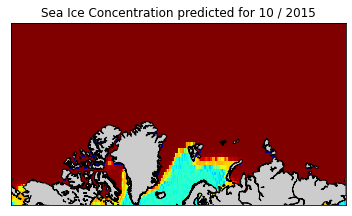

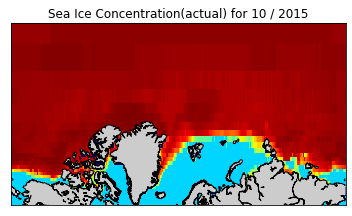

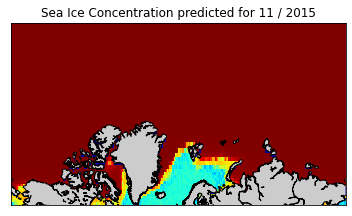

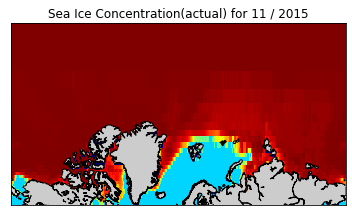

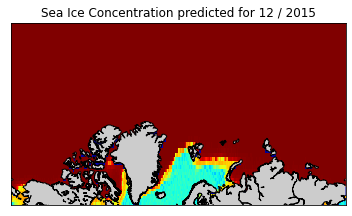

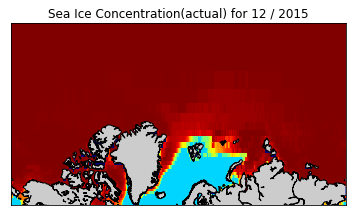

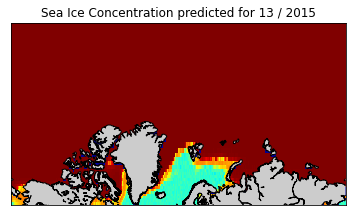

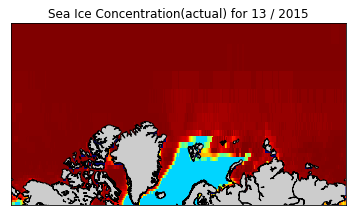

In [21]:
X_check = X_test[137:150].reshape(13, N_stack, numlat, numlong,  1)
Y_check = Y_test[137:150]
Y_pred = model3.predict(X_check)
print(Y_pred.shape)
Y_pred = Y_pred.reshape(13, 30, 360)
Y_check = Y_check.reshape(13, 30, 360)
for i in range(len(Y_pred)):
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , lats = np.meshgrid(longi,lat)
  x ,y = mp(longs, lats)
  c_scheme = mp.pcolor(x,y,np.squeeze(Y_pred[i]), cmap = 'jet')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('Sea Ice Concentration predicted for ' + str(i+1) + ' / 2015')
  plt.show()
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , lats = np.meshgrid(longi,lat)
  x ,y = mp(longs, lats)
  c_scheme = mp.pcolor(x,y,np.squeeze(Y_check[i]), cmap = 'jet')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('Sea Ice Concentration(actual) for ' + str(i+1) + ' / 2015')
  plt.show()

(13, 10800)


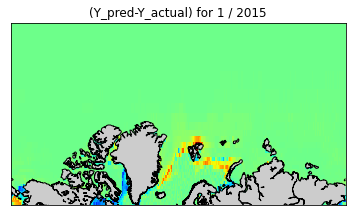

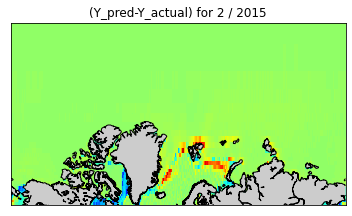

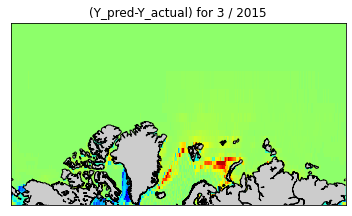

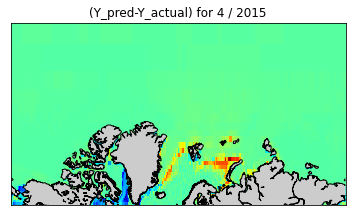

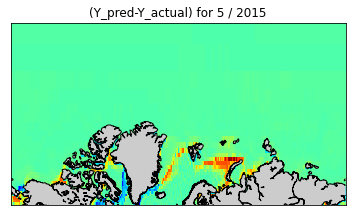

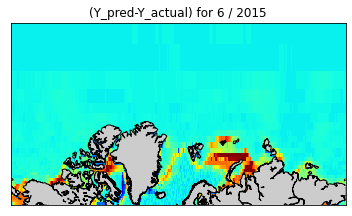

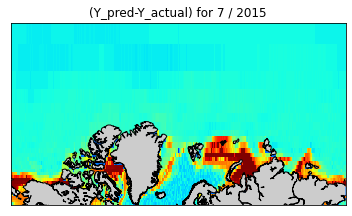

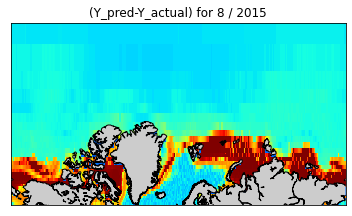

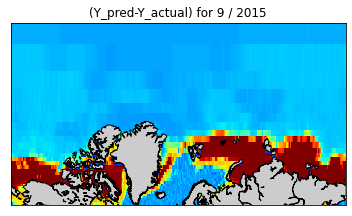

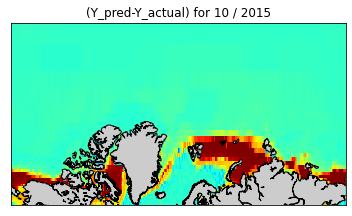

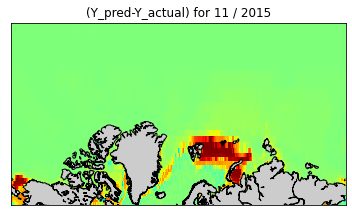

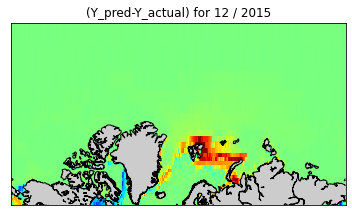

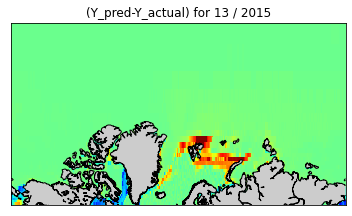

In [22]:
X_check = X_test[137:150].reshape(13, N_stack, numlat, numlong,  1)
Y_check = Y_test[137:150]
Y_pred = model3.predict(X_check)
print(Y_pred.shape)
Y_pred = Y_pred.reshape(13, 30, 360)
Y_check = Y_check.reshape(13, 30, 360)
diff_Y = Y_pred-Y_check
for i in range(len(diff_Y)):
  mp = Basemap(projection='merc',llcrnrlon=-180.,llcrnrlat=60.,urcrnrlon=180.,urcrnrlat=89.,resolution='l')
  longs , lats = np.meshgrid(longi,lat)
  x ,y = mp(longs, lats)
  c_scheme = mp.pcolor(x,y,np.squeeze(diff_Y[i]), cmap = 'jet')
  mp.drawcoastlines()
  mp.fillcontinents()
  plt.title('(Y_pred-Y_actual) for ' + str(i+1) + ' / 2015')
  plt.show()

0.9985198
0.9599999785423279


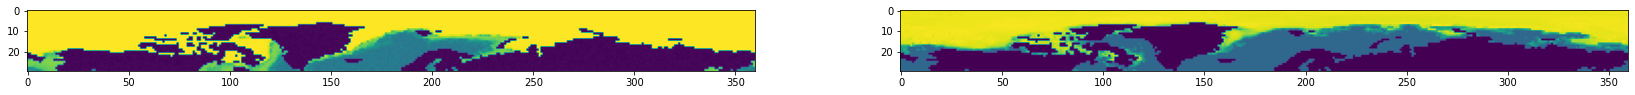

In [23]:
X_check = X_test[-2:-1].reshape(1, N_stack, numlat, numlong,  1)
Y_check = Y_test[-2:-1]
Y_pred = model3.predict(X_check)
Y_pred = Y_pred.reshape(30, 360)
Y_check = Y_check.reshape(30, 360)

x_coord = 1
y_coord = 1
print(Y_pred[x_coord, y_coord])
print(Y_check[x_coord, y_coord])

fig=plt.figure(figsize=(60, 720))
columns = 4
rows = 5
fig.add_subplot(rows, columns, 1)
plt.imshow(Y_pred)
fig.add_subplot(rows, columns, 2)
plt.imshow(Y_check)

plt.show()

0.9986588
0.9899999499320984


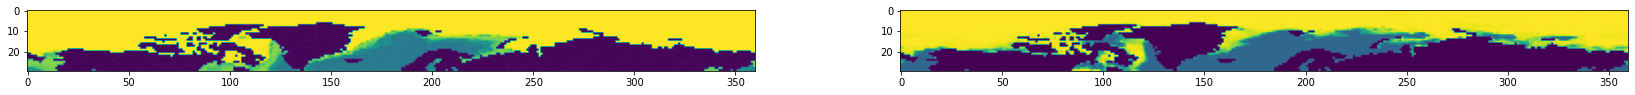

In [24]:
X_check = X_test[-3:-2].reshape(1, N_stack, numlat, numlong,  1)
Y_check = Y_test[-3:-2]
Y_pred = model3.predict(X_check)
Y_pred = Y_pred.reshape(30, 360)
Y_check = Y_check.reshape(30, 360)

x_coord = 1
y_coord = 1
print(Y_pred[x_coord, y_coord])
print(Y_check[x_coord, y_coord])

fig=plt.figure(figsize=(60, 720))
columns = 4
rows = 5
fig.add_subplot(rows, columns, 1)
plt.imshow(Y_pred)
fig.add_subplot(rows, columns, 2)
plt.imshow(Y_check)

plt.show()

In [25]:
## Predicting 3 months data
X_input = X[1733:1807].reshape(72, N_stack, numlat, numlong,  1)
Y1 = model2.predict(X_input)
Y_avg = Y1
for i in range(2,len(Y1)):
  Y_avg[i] = (Y1[i] + Y1[i-1] + Y1[i-2])/3

plt.figure(figsize=(10, 120))
plt.imshow(Y_avg[-2].reshape(30,360))

NameError: ignored